<a href="https://colab.research.google.com/github/Sarthak-wa/CV1/blob/main/Assignment_1(Revised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries:

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define helper functions for LBP calculation

In [2]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]

    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y-1))    # top_left
    val_ar.append(get_pixel(img, center, x-1, y))      # top
    val_ar.append(get_pixel(img, center, x-1, y + 1))  # top_right
    val_ar.append(get_pixel(img, center, x, y + 1))    # right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))# bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y))    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y-1))  # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))      # left

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]

    return val

# Binary to Decimal Conversion

In [3]:
def binary_to_decimal(binary):
    decimal = 0
    for i in range(len(binary)):
        decimal += binary[i] * (2 ** (len(binary) - i - 1))
    return decimal

# Define the main LBP image calculation function

In [4]:
def lbp_img(img_gray):
    height, width = img_gray.shape
    img_lbp = np.zeros((height, width), np.uint8)

    for i in range(1, height-1):
        for j in range(1, width-1):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    return img_lbp

# Load input images

In [5]:
from google.colab import files
upload = files.upload()

Saving img1.jpg to img1.jpg
Saving img2.jpg to img2.jpg


In [6]:
img_a = cv2.imread('img1.jpg')
img_b = cv2.imread('img2.jpg')

# Displaying Both Images

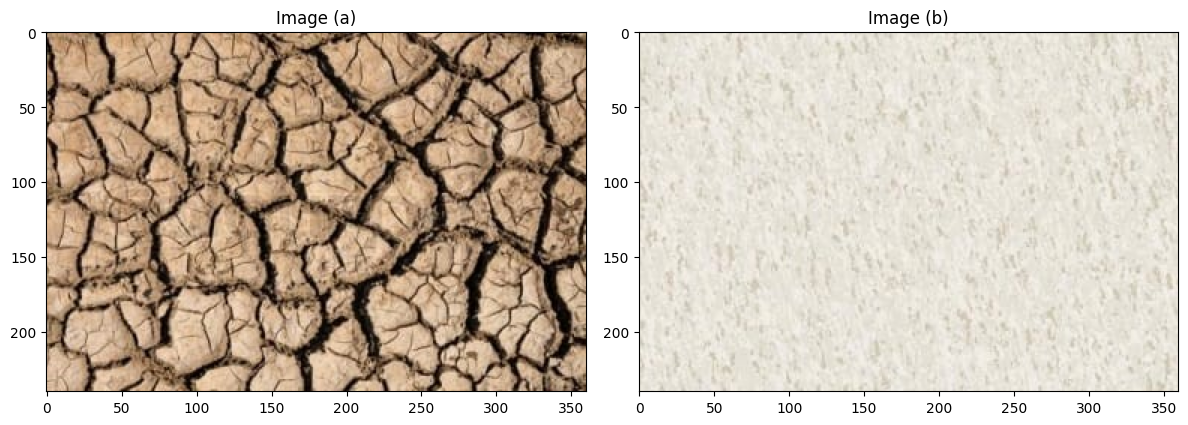

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB))
plt.title('Image (a)')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
plt.title('Image (b)')

plt.tight_layout()
plt.show()

# Displaying Both Grayscale Images

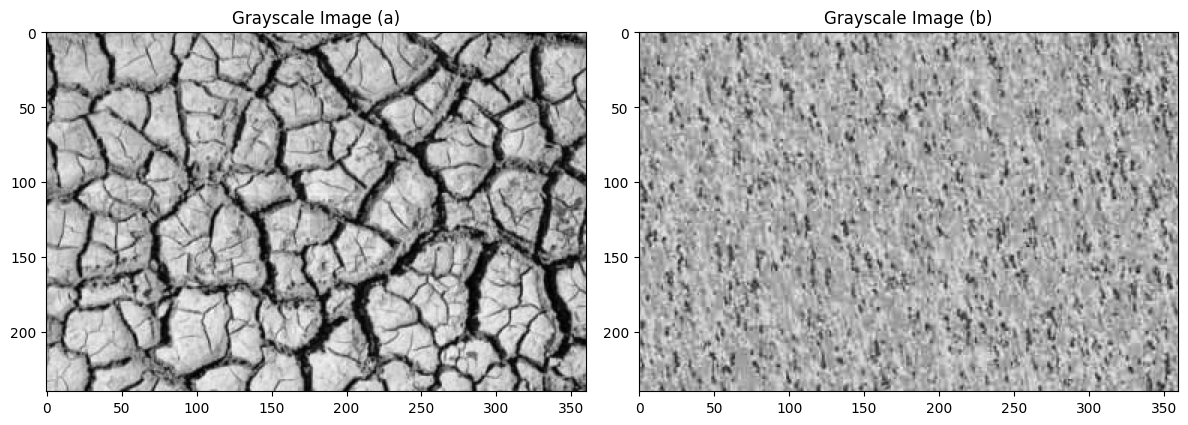

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
gray_a=cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY) #BGR to GRAY conversion
plt.imshow(gray_a, cmap='gray')
plt.title('Grayscale Image (a)')

plt.subplot(122)
gray_b=cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_b, cmap='gray')
plt.title('Grayscale Image (b)')

plt.tight_layout()
plt.show()

# LBP Conversion

In [9]:
lbp_img_a = lbp_img(gray_a)
lbp_img_b = lbp_img(gray_b)

# Display the LBP images

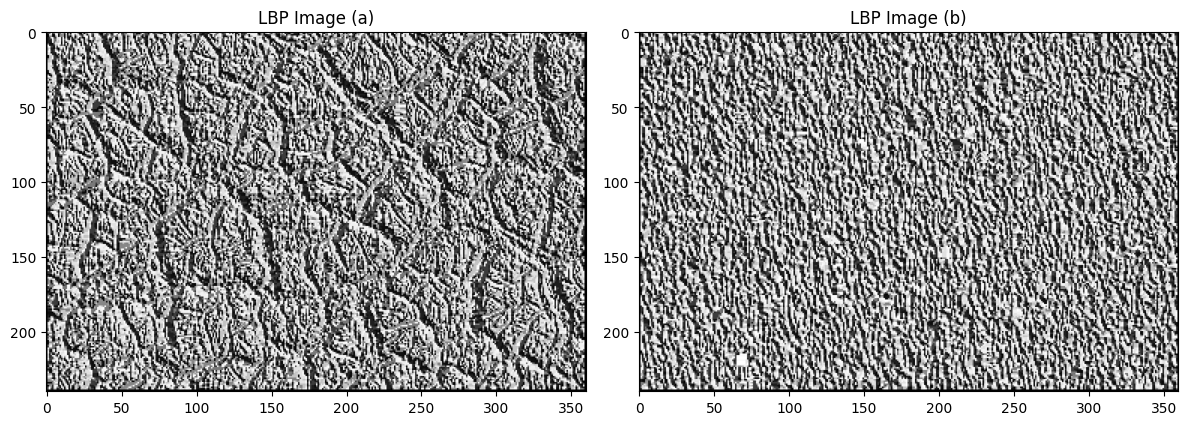

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(lbp_img_a, cmap='gray')
plt.title('LBP Image (a)')

plt.subplot(122)
plt.imshow(lbp_img_b, cmap='gray')
plt.title('LBP Image (b)')

plt.tight_layout()
plt.show()